# Regressão Linear com Scikit-Learn
- Este notebook faz parte da atividades teóricas do clube de Inteligência Artificial da Escola Sesc de Ensino Médio;
- Nesta atividade iremos aprender mais sobre algoritmos de Regressão Linear utilizando uma biblioteca muito utilizada para Machine Learning, a Scikit-Learn.

## Scikit-Learn
- A scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

https://scikit-learn.org/

## 1. Preparando os dados

### 1.1 Importando as bibliotecas principais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**NumPy** é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas. *Wikipédia*

**Pandas** é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais. É software livre sob a licensa licença BSD. *Wikipédia*

**Matplotlib** é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para a da linguagem de programação Python e sua extensão de matemática NumPy. Originalmente criada pelo biólogo e neurocientista americano John D. *Wikipédia*

### 1.2 Importando  e visualizando o Dataset
**Dataset** é uma coleção de dados (conjunto de dados) normalmente tabulados. Por cada elemento se indicam várias características. Cada coluna representa uma variável particular. Cada linha corresponde a um determinado membro do conjunto de dados em questão. Cada valor é conhecido como um dado.

#### Sobre o Dataset deste projeto

**Consumo de cerveja em São Paulo**: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até as grandes festas de casamento. A verdade é que, em todo o mundo, milhares de pessoas consomem a bebida regularmente e também em diferentes situações. 

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de estudantes de 18 a 28 anos (média) com período de um ano.

**O objetivo** deste treinamento será estimar um modelo de Machine Learning utilizando a técnica de Regressão Linear para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

Descrição das características do Dataset:
- data - Data
- temp_media - Temperatura Média (°C)
- temp_min - Temperatura Mínima (°C)
- temp_max - Temperatura Máxima (°C)
- chuva - Precipitação (mm)
- fds - Final de Semana (1 = Sim; 0 = Não)
- consumo - Consumo de Cerveja (litros)

#### Lendo o arquivo que contém os nossos dados e criando um Dataframe com o Pandas

In [2]:
df = pd.read_csv('consumo_cerveja.csv', sep=';')

#### Mostrando as 5 primeiras linhas do Dataframe

In [3]:
df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


#### Mostrando as 5 últimas linhas do Dataframe

In [4]:
df.tail()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467
364,31/12/2015,24.76,20.2,29.0,0.0,0,22446


#### Exibindo informações importantes do Dataset

In [5]:
df.describe().round(2) # Resume e descreve algumas operações gerais do Dataset. Round(2) arredonda para 2 casas decimais.

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [6]:
print(f'Tamanho do Dataframe: {df.shape[0]} linhas e {df.shape[1]} colunas') # Descreve o tamanho do dataframe em uma tupla

Tamanho do Dataframe: 365 linhas e 7 colunas


In [7]:
df.info() # Descreve informaçoes de tamanho e de tipo das características

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


### 1.3 Selecionando as características principais para o estudo

#### Variável dependente
Representa uma grandeza cujo valor depende de como a variável independente é manipulada.

In [11]:
y = df[['consumo']]
y.head()

,consumo
0,25461
1,28972
2,30814
3,29799
4,28900


#### Variável Independente ou Explicativa
Representa uma grandeza que está sendo manipulada em um experimento.

In [10]:
X = df[['temp_max']]
X.head()

,temp_max
0,32.5
1,33.5
2,29.9
3,28.6
4,28.3


### 1.4 Exibir a correlação entre as características selecionadas do dataset

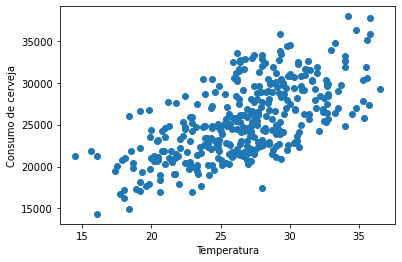

In [12]:
# Aqui utilizaremos o Matplotlib para criar um gráfico de disperssão dos valores correlacionados entre as variáveis selecionadas
plt.scatter(X, y)
plt.ylabel("Consumo de cerveja")
plt.xlabel("Temperatura")
plt.show();

**O que já podemos inferir com base neste gráfico?**

## 2. Escolher um modelo

<img src="https://scikit-learn.org/stable/_static/ml_map.png"/>

### 2.1 Regressão Linear
A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

$$
y = bX + a
$$

<img src="https://www.researchgate.net/profile/Hieu_Tran33/publication/333457161/figure/fig3/AS:763959762247682@1559153609649/Linear-Regression-model-sample-illustration.ppm"/>

#### Importando os algoritmos LinearRegression e metrics da biblioteca scikit-learn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2.2 Criando os datasets de treino e de teste

#### Importando o train_test_split da biblioteca scikit-learn
A função train_test_split nos ajuda a dividir o dataset em treino e teste com base nos parâmetros defini

In [14]:
from sklearn.model_selection import train_test_split

#### Utilizando a função train_test_split e inserindo os dados nas variáveis indicadas
O **test_size** representa a proporção do dataset que será incluída na divisão de teste. Os valores pode ir de 0.0 a 1.0.

O **random_state** garante que as divisões geradas sejam reproduzíveis. O Scikit-learn usa permutações aleatórias para gerar as divisões. O estado aleatório que você fornece é usado como uma semente para o gerador de números aleatórios. Isso garante que os números aleatórios sejam gerados na mesma ordem.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Verificando os tamanhos dos arquivos gerados pela função *train_test_split*.

In [17]:
print(f'Dataset original: X(temp_max) = {X.shape}, y(consumo) = {y.shape}')
print(f'Datasets de treino: X(temp_max) = {X_train.shape}, y(consumo) = {y_train.shape}')

Dataset original: X(temp_max) = (365, 1), y(consumo) = (365, 1)
Datasets de treino: X(temp_max) = (255, 1), y(consumo) = (255, 1)


## 3. Ajustar os dados ao modelo e fazer a predição

### 3.1 Instanciar a classe LinearRegression()
As classes em linguagens de programação são projetos de um objeto que possui características e comportamentos, ou seja, permite armazenar **propriedades** e **métodos** dentro dela. Instanciar uma classe significa que poderá utilizar tudo que está incluído nela ao atribuí-la a uma variável.

In [18]:
modelo = LinearRegression()

In [19]:
modelo.get_params() # Principais parâmetros personalizáveis da classe

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

### 3.2 Utilizando o método .fit()
O método .fit() do objeto modelo criado da classe LinearRegression() estimará o modelo linear utilizando os dados de TREINO, ou seja, treinará o nosso modelo. 

In [20]:
modelo.fit(X_train, y_train)

LinearRegression()

### 3.3 Exibindo os coeficientes A e B da regressão

In [21]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [9186.25400006]
(B) Inclinação:  [[604.41699528]]


### 3.4 Plotando a linha da regressão no gráfico do Dataset de treino

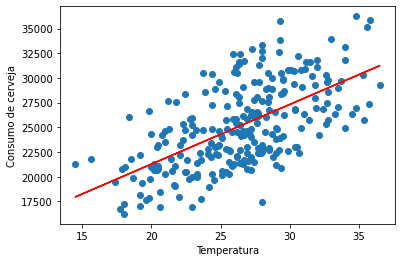

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, modelo.coef_[0][0]*X_train + modelo.intercept_[0], '-r')
plt.ylabel("Consumo de cerveja")
plt.xlabel("Temperatura")
plt.show()

### 3.5 Gerando previsões para o Dataset de teste

In [23]:
y_prevs = modelo.predict(X_test)

### 3.6 Plotando a linha da regressão no gráfico do Dataset de teste

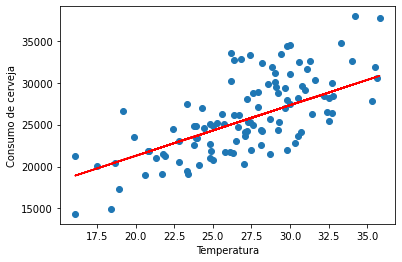

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, modelo.coef_[0][0]*X_test + modelo.intercept_[0], '-r')
plt.ylabel("Consumo de cerveja")
plt.xlabel("Temperatura")
plt.show()

## 4. Avaliando o modelo criado

### 4.1 Utilizando o método .score() para obter o Coeficiente de Determinação (R²) do modelo
Calcula a soma dos quadrados dos resíduos dividida pelo total da soma dos quadrados. A melhor pontuação é 1.0

**Coeficiente de Determinação (R²) para os Datasets de Treino**

In [25]:
print(f'Coeficiente de Determinação (R²) = {modelo.score(X_train, y_train).round(2)}')

Coeficiente de Determinação (R²) = 0.38


**Coeficiente de Determinação (R²) para os Datasets de Teste**

In [26]:
print(f'Coeficiente de Determinação (R²) = {modelo.score(X_test, y_test).round(2)}')

Coeficiente de Determinação (R²) = 0.46


## 5. O que poderíamos fazer para melhorar esses valores?

### Melhorar através da experimentação!